<a href="https://colab.research.google.com/github/abayro125/MAT494/blob/main/2_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**2.3 Independent Variables and Random Samples**

2.3.1 Joint Probability Distributions

Joint probability is the probability of two or more events
happening together. A joint probability distribution shows a probability distribution
for two (or more) random variables.

2.3.1.1 Two Discrete Random Variables

The probability mass function (pmf) of a single discrete random variable X
can be extended to two variables X,Y for describing how much probability
mass is placed on each possible pair of values (x,y).
Definition 2.3.1 Let X and Y be two discrete random variable’s defined on
the sample space S of an experiment. The joint probability mass function
p(x,y) is defined for each pair of numbers (x,y) by
p(x,y) = P(X = x and Y = y)

Definition 2.3.2 The marginal probability mass function of X, denoted by
pX (x), is given by
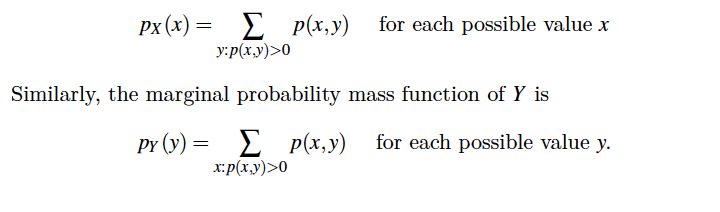

In [ ]:
import numpy as np
from scipy.stats.contingency import margins

join_probability_X_Y = np.array([
                [0.01, 0.02, 0.04, 0.04],
                [0.03, 0.24, 0.15, 0.06],
                [0.04, 0.10, 0.08, 0.08],
                [0.02, 0.04, 0.03, 0.02]
            ]) #joint probability array


x, y = margins(join_probability_X_Y)

print("The marginal distribution from the joint probability distribution is",x.T)

The marginal distribution from the joint probability distribution is [[0.11 0.48 0.3  0.11]]


2.3.1.2 Two Continuous Random Variables

The probability that the pair (X,Y) of continuous random variable’s falls in
a two-dimensional set A (such as a rectangle) is obtained by integrating a
function called the joint density function.

Definition 2.3.3 Let X and Y be continuous random variables. A joint probability
density function f (x,y) for these two variables is a function satisfying
f (x,y) ≥ 0 and R ∞
−∞
R ∞
−∞ f (x,y)dxdy = 1. Then for any two-dimensional set A


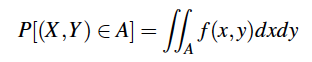

Definition 2.3.4 The marginal probability density functions of X and Y, denoted
by fX (x) and fY (y), respectively, are given by


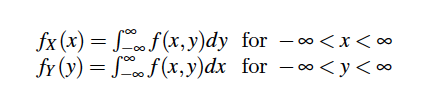

2.3.1.3 Independent Random Variables

Independent random variables describe a situation where the occurrence of
one does not affect the probability of occurrence of the other (equivalently,
does not affect the odds). One way of defining independence of two events is
via the condition P(A∩B) = P(A) · P(B).

Definition 2.3.5 Two random variables X and Y are said to be independent
if for every pair of x and y values
p(x,y) = pX (x) · pY (y) when X and Y are discrete
or
f (x,y) = fX (x) · fY (y) when X and Y are continuous

Definition 2.3.6 If X1,X2, . . . ,Xn are all discrete random variables, the joint
pmf of the variables is the function
p(x1,x2, . . . ,xn) = P(X1 = x1,X2 = x2, . . . ,Xn = xn)

Definition 2.3.7 The random variables X1,X2, . . . ,Xn are said to be independent
if for every- subset Xi1 ,Xi2 , . . . ,Xik of the variables (each pair, each triple,
and so on), the joint pmf or pdf of the subset is equal to the product of the
marginal pmf’s or pdf’s.

2.3.2 Correlation and Dependence

2.3.2.1 Correlation for Random Variables
Definition 2.3.8 Let X and Y be jointly distributed random variable’s with
pmf p(x,y) or pdf f (x,y) according to whether the variables are discrete or continuous. The covariance between two random variable’s X and Y is

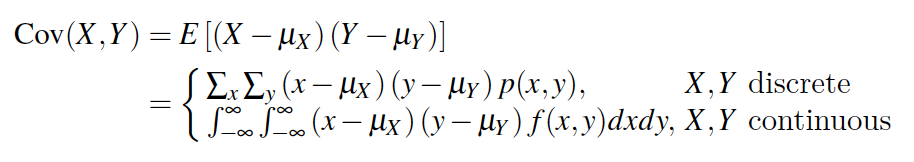

In [ ]:

def calculate_covariance(distr_table): #function determines the covariance between two variables given the probability
    px_marginal, py_marginal = create_marginal_pmfs(distr_table)
    mu_x = sum([k*v for k,v in px_marginal.items()])
    mu_y = sum([k*v for k,v in py_marginal.items()])

    cov_xy = 0

    for x in px_marginal:
        for y in py_marginal:
            cov_xy += (x-mu_x)*(y-mu_y)*distr_table[(distr_table.X==x) & (distr_table.Y==y)].pr.iloc[0]
    return cov_xy

    distr_table_1 = pd.DataFrame({
    'X': [0, 0, 0, 0, 1, 1, 1, 1], #x variable
    'Y': [0, 1, 2, 3, 0, 1, 2, 3], #y variable
    'pr': [1/8, 2/8, 1/8, 0, 0, 1/8, 2/8, 1/8] #probabilities
})

print("The covariance is: ",calculate_covariance(distr_table_1))

The covariance is:  0.25


Definition 2.3.9 The correlation coefficient of X and Y, denoted by Corr(X,Y),ρX,Y ,
or just ρ, is defined by

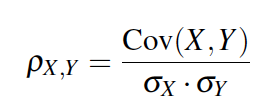

In [ ]:
def calculate_correlation(distr_table: pd.DataFrame): #function determines the correlation coefficient
    px_marginal, py_marginal = create_marginal_pmfs(distr_table)
    cov_xy = calculate_covariance(distr_table)
    mu_x = sum([k*v for k,v in px_marginal.items()])/len(px_marginal)
    mu_y = sum([k*v for k,v in py_marginal.items()])/len(py_marginal)

    var_x = 0
    var_y = 0

    for x, px in px_marginal.items():
        var_x += px*(x-mu_x)**2

    for y, py in py_marginal.items():
        var_y += py*(y-mu_y)**2
    corr_xy = cov_xy / (var_x*var_y)
    return corr_xy #function returns the correlation coefficient

    distr_table_1 = pd.DataFrame({
    'X': [0, 0, 0, 0, 1, 1, 1, 1],  #x variable
    'Y': [0, 1, 2, 3, 0, 1, 2, 3], #y variable 
    'pr': [1/8, 2/8, 1/8, 0, 0, 1/8, 2/8, 1/8] #probability
})

print("The correlation is: ",calculate_correlation(distr_table_1))

The correlation is:  0.39689922480620154


Text(0, 0.5, 'y axis')

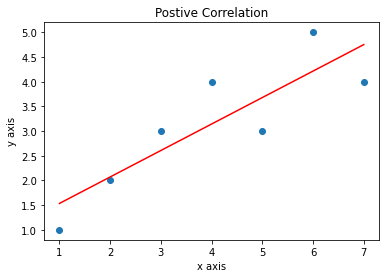

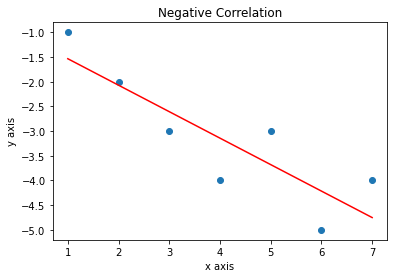

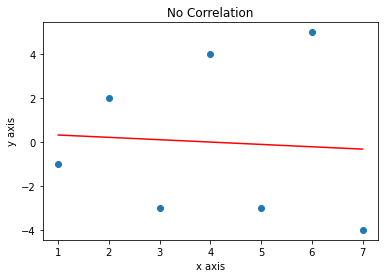

In [ ]:
from matplotlib import figure

import sklearn
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

y = pd.Series([1, 2, 3, 4, 3, 5, 4]) #array for positive correlation
y2 = pd.Series([-1, -2, -3, -4, -3, -5, -4]) #array for negative correlation
y3 = pd.Series([-1, 2, -3, 4, -3, 5, -4]) #array for no correlation
x = pd.Series([1, 2, 3, 4, 5, 6, 7]) #x array
correlation = y.corr(x) #determines the correlation
correlation


# adds the title
plt.title('Postive Correlation')
# plot the data
plt.scatter(x, y)
# fits the best fitting line to the data
plt.plot(np.unique(x),
         np.poly1d(np.polyfit(x, y, 1))
         (np.unique(x)), color='red')
# Labelling axes
plt.xlabel('x axis')
plt.ylabel('y axis')


plt.figure()
correlation = y2.corr(x)
correlation
# adds the title
plt.title('Negative Correlation') 
# plot the data
plt.scatter(x, y2)
# fits the best fitting line to the data
plt.plot(np.unique(x),
         np.poly1d(np.polyfit(x, y2, 1))
         (np.unique(x)), color='red')
# Labelling axes
plt.xlabel('x axis')
plt.ylabel('y axis')


plt.figure()
correlation = y3.corr(x)
correlation
# adds the title
plt.title('No Correlation')
# plot the data
plt.scatter(x, y3)
# fits the best fitting line to the data
plt.plot(np.unique(x),
         np.poly1d(np.polyfit(x, y3, 1))
         (np.unique(x)), color='red')
# Labelling axes
plt.xlabel('x axis')
plt.ylabel('y axis')

2.3.2.2 Correlation For Samples

Correlation coefficient, when applied to a sample, is commonly represented
by rxy and may be referred to as the sample correlation coefficient or the
sample Pearson correlation coefficient.

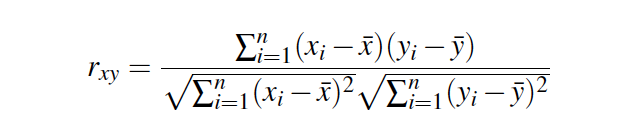

2.3.3 Random Samples

2.3.3.1 Random Samples
A simple random sample is a randomly selected subset of a population and
often is used in practice.
Definition 2.3.12 The random variable’s X1,X2, . . . ,Xn are said to form a (simple)
random sample of size n if
1. The Xi ’s are independent random variable’s .
2. Every Xi has the same probability distribution.

2.3.3.2 The Central Limit Theorem
Theorem 2.3.14 (The Central Limit Theorem (CLT)) Let X1,X2, . . . ,Xn be a
random sample from a distribution with mean μ and variance σ 2. Then if n
is sufficiently large, ¯X has approximately a normal distribution with μ ¯X = μ
and σ2¯X = σ 2/n, and To also has approximately a normal distribution with
μTo = nμ,σ 2
To = nσ 2. The larger the value of n, the better the approximation.

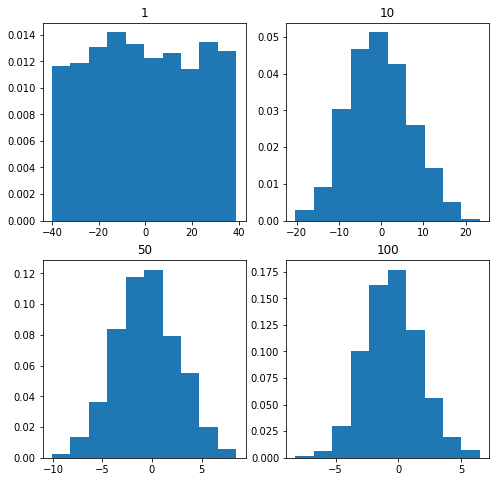

In [ ]:
import numpy
import matplotlib.pyplot as plt
 
# number of sample
num = [1, 10, 50, 100] 
# list of sample means
means = [] 
 
# Generating 1, 10, 30, 100 random numbers from -40 to 40
# taking their mean and appending it to list means.
for j in num:
    # Generating seed so that we can get same result
    # every time the loop is run...
    numpy.random.seed(1)
    x = [numpy.mean(
        numpy.random.randint(
            -40, 40, j)) for _i in range(1000)]
    means.append(x)
k = 0
 
# plotting all the means in one figure
fig, ax = plt.subplots(2, 2, figsize =(8, 8))
for i in range(0, 2):
    for j in range(0, 2):
        # Histogram for each x stored in means
        ax[i, j].hist(means[k], 10, density = True)
        ax[i, j].set_title(label = num[k])
        k = k + 1